# Abstract
Estimating incoming web traffic is essential for tech giants to plan efficient server allocation and resource management. We present a low cost service which once trained can estimate page views and hence the traffic inflow at a given point of time. We have done our analysis and modeling on Wikipedia page view data. Our choice of using Long short-term memory (LSTM) based Recurrent Neural Nets to predict the page views has shown significant results. We were able to predict the peaks and troughs of page view graph with a high accuracy. 

# 1. Introduction

For the tech giants, a big slice of the budget is used in managing server resources to handle the incoming web traffic. Server resources include(not limited to) the number of machines running, processing power, memory usage, etc. If resources are insufficient, users may experience latency. The users who are active during this time may even leave for similar services from rivals. On the other hand, if more resources than required are allocated, resources get underutilized, meaning more money than required is spent on the resources. This also has an adverse impact on the environment as keeping the resources powered needs a lot of energy. It is hence essential and prudent to have a low cost service which once trained can estimate page views and hence the traffic inflow at a given point of time. This will help in more efficient server allocation and resource management. We have addressed this problem of web traffic estimation of various Wikipedia pages using Long short-term memory (LSTM) based Recurrent Neural Nets with the time series data of Web Traffic as input. 

# 2. Related Work

In the past Vector autoregression (VAR) models and Autoregressive integrated moving average (ARIMA) models have been used to model time series data. [3] does a comparative study of VAA model and univariate and multivariate ARIMA models. However these models were not able to capture dependencies of varying and unknown window size. Later RNNs were found to work better with time series data. An interesting blog on the effectiveness of RNNs can be found at [5] by Karpathy. However RNNs faced the problem of vanishing and exploding gradient. Later LSTM based RNNs were introduced to tackle all these problems and be able to capture long term dependencies in sequential data like time series data. LSTM was first introduced by Sepp Hochreiter and Jürgen Schmidhuber [2] in 1997. However they were refined and popularized by the works of many people including Felix Gers, Fred Cummins, Santiago Fernandez, Justin Bayer, Daan Wierstra, Julian Togelius, Faustino Gomez, Matteo Gagliolo, and Alex Graves. 
In our work we observed that dropout does not work well with RNNs as the recurrence in the network amplifies noise thus hurting learning which is in line with the claims of Bayer et al. [4]. Recently, many academic and non academic projects have used LSTMs as the core technology to analyse sequential data.  [6]-[9] talk about time series prediction using LSTM.

# 3. Background

Long Short Term Memory (LSTM) based Recurrent Neural Network (RNN) 

## 3.1 RNN

RNNs are a neural network that was developed to model sequential data like time series data, video data, language etc because traditional neural networks like Convolutional Networks fail to encode or preserve sequential data. Recurrent Neural Networks are networks with loops that allow sequential information to persist. 

<img src="image/RNN-rolled.png" style="height:80px" title="Rolled Recurrent Neural Network [1]"/>

In the above figure, the network module A takes Xt , which is the input at time step t. It processes the information and generates the output ht . It also passes the output information to the next time step state of module A. So at the next time step, the output of the previous timesteps and the new input Xt+1 are considered to generate the output ht+1. It is hence a stateful network as opposed to a stateless network. This process can be visualised in the following figure.

<img src="image/RNN-unrolled.png" style="height:80px" title="Unrolled Recurrent Neural Network [1]"/>

RNNs have been used in many applications with much success. However, RNNs suffer from a problem known as vanishing gradient problem, that effectively means that the output at a time step can only be affected by a certain number inputs at previous timesteps. This is a common problem in deep neural networks. This can also be thought of as the network cell state cannot capture long term dependencies. To mitigate this problem LSTMs were designed.

## 3.2 LSTM

LSTMs are special kind of RNNs. In these kind of RNNs, each module has more number parameters to be learned, but these parameters give the network more flexibility to decide what information to keep from previous time steps and what information to discard. This way LSTMs model long term dependencies. Following a diagrammatic representation of an LSTM module at different timesteps. 

<img src="image/LSTM3-chain.png" style="height:200px" title="The repeating module in an LSTM [1]" />

Where the following notation holds,

<img src="image/LSTM2-notation.png" style="height:50px" title="Notation of the above figure [1]" />

The LSTM block above has 4 main components: a cell state, an input gate, an output gate and a forget gate. Each one of these components has a specific function. The cell state is supposed to remember values over arbitrary time intervals. The three gates can be considered as a conventional feedforward artificial neural network neuron. That is, they compute an activation of the weighted sum. More simply, they can be thought of as being involved in regulating the flow of values that pass through them.
An LSTM works well to classify, process and predict time series data given time lags of varying size and duration between important events. This kind of Recurrent Neural Network is hence ideal for our problem because we have a series of values corresponding to the Web traffic data of the Wikipedia page per day and we want to predict the traffic data on upcoming days. This is a state of the art technique for identifying such relationships in time series data.



# 4. Dataset
We have done our data exploration and analysis on Wikipedia page view data using the Rest API https://en.wikipedia.org/api/rest_v1/#/ . The API has an hourly limit of 200 hits per hour, so we were able to get 200 pages data per hour per machine. Since this is publicly available data showing only page view counts, there are no privacy concerns. The API returns a json response with the page name, granularity(daily in our case), timestamp and view count for the requested webpage. We parsed the json to extract required information. 

We have used Wikipedia web traffic data provided by Kaggle (https://www.kaggle.com/c/web-traffic-time-series-forecasting#evaluation) for our modelling.
The data has been made publicly available by Kaggle and it shows only page title,host website (example en.wikipedia.com, zh.wikipedia.com etc), agent(spider, all etc) and view counts per day. 

All the data is from July 1, 2015 up until December 31, 2016.

                                                            

# 5. Data exploration

We have used Spark to collect and analyse the data. The code is completely parallelizable and can run on multiple cores for faster response. We created visualizations for a period of six months with daily samples. The visualizations have helped us understand which web pages have a periodic web traffic structure, which are harder to predict and what is the estimated value of web traffic at any given point of time. Using this analysis, we have identified a subset of topics like TV Series, refer figure below, whose traffic is more periodic in nature

<img src="image/tv-series.png" style="height:300px" title="TV series data" />

as opposed to political figures like Donald Trump, where you can see a sudden spike in viewership right after the election results, refer figure below. 

<img src="image/POTUS.png" style="height:300px" title="Donald Trump" />

<b> All code can be found in the ‘web_traffic’ notebook. </b>



# 6. Model Implementation Details

We experimented with different libraries like native Tensorflow, Tflearn, Pytorch and Keras for our implementation. We decided to use Keras with Tensorflow backend for our final implementation. This decision was made because of the stability and ease of use of Keras. We implemented a single layer LSTM model followed by a dense layer to give the result of regression. 

While we spent hours tweaking the model parameters, we decided the below parameters for the final implementation.

Sequence Length - 7 
LSTM Memory Cells - 32
LSTM Activation - ReLU
Loss - MSE(mean_squared_error)

We initialized our model weights to ‘Xavier’[11] initializer(aka ‘glorot_normal’) and then we used the ADAM optimizer [10] for converging the weights of the model during training. 

The input to our model is a time series with 7 time steps, each observation of the time series has four main components ‘Agent’(All or Spider), ‘Access’(Mobile, Desktop or All), ‘Source’(9 different sources like ‘en.wikipedia.org’, ‘de.wikipedia.org’, etc) and the ‘Web Traffic’ on this observation’s date. The input is further formatted into One-Hot Encoded Vectors for the categorical variables and left as real-valued for the ‘Web Traffic’. We combine the different One-Hot encodings to create a concatenated input of (1 x 7 x 15) which represents (number of datapoints x 7 time steps x (2 variables for Agent + 3 variables for Access + 9 variables for Source + 1 variable real-valued Web Traffic). The output is a real valued number indicating the number of pages visits corresponding to the page, agent,website on the next day. We trained the models on 10 epochs each.

We have implemented two separate models, one for all data(145064 articles) and one for TV series data (538 articles). After converting the the data to its appropriate format, we get a full dataset of (78769752 x 7 x 15) and a smaller TV series dataset of (292134 x 7 x 15). The output is a corresponding real valued vector.

The models were trained on two different machines 

ThinkPad 13 (Local) - Intel Core i5-6300 CPU with 8GB Memory running Ubuntu 16.04
iLab Machine null.cs.rutgers.edu (Remote) - Intel Core i7-4770 with 16GB Memory and GeForce GT 630 GPU running CentOS 7.3

The local machine was used for training on smaller datasets and tweaking parameters. The iLab machine was used to run the model with the full dataset. A gpu version of tensorflow was also installed to take advantage of the GPU available on the iLab machine.

For the smaller models, it took anywhere between 20 mins to 3 hours to train. However, for the model on full dataset, it took ~55 hours to complete the training over 10 epochs.

For training, we have split the dataset with first 80% values in training set and remaining 20% values in testing set. We also tested with shuffling the data and without shuffling the data for training. We achieved better results without shuffling the data.


## 6.1 Code

We start by importing necessary libraries

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
from time import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import TensorBoard

Using TensorFlow backend.


### 6.1.1 Reading Dataset
The dataset is read from the training file, full data is stored in `train` and TV series data is filtered and stored in `train_TV`

In [36]:
#Importing dataset
train = pd.read_csv('./data/train_1.csv').fillna(0)
page = train['Page']
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [37]:
train_TV = train[train['Page'].str.contains('TV_series')]
train_TV.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
8457,A_Series_of_Unfortunate_Events_(TV_series)_en....,0.0,0.0,0.0,0.0,5.0,30.0,5.0,3.0,2.0,...,1853.0,2023.0,1767.0,1525.0,1959.0,2279.0,2564.0,2192.0,1959.0,1614.0
8515,American_Crime_(TV_series)_en.wikipedia.org_de...,876.0,663.0,671.0,660.0,727.0,947.0,739.0,749.0,736.0,...,1170.0,953.0,836.0,728.0,1078.0,1258.0,1253.0,1352.0,1178.0,1082.0
8538,Animal_Kingdom_(TV_series)_en.wikipedia.org_de...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,706.0,599.0,607.0,458.0,741.0,1108.0,2496.0,2832.0,1141.0,871.0
8567,Arrow_(TV_series)_en.wikipedia.org_desktop_all...,8233.0,7920.0,7049.0,6736.0,8129.0,8946.0,8638.0,8529.0,8812.0,...,6482.0,5263.0,4435.0,4269.0,5299.0,6665.0,6684.0,6538.0,5870.0,4593.0
8621,Bates_Motel_(TV_series)_en.wikipedia.org_deskt...,2025.0,1953.0,2088.0,1969.0,2079.0,2632.0,2266.0,2368.0,2171.0,...,1496.0,1199.0,1113.0,1022.0,1335.0,1757.0,1690.0,1609.0,1568.0,1338.0


### Extracting the features
The features are extracted from the Page name

In [38]:
def get_source(page):
    res = re.search('_[a-z]+\.[a-z]+\.[a-z]+_[a-z\-]+_[a-z]+',page)
    if res:
        return res.group().split('_')[1]
    return 'na'

def get_access(page):
    res = re.search('_[a-z]+\.[a-z]+\.[a-z]+_[a-z\-]+_[a-z]+',page)
    if res:
        return res.group().split('_')[2]
    return 'na'

def get_agent(page):
    res = re.search('_[a-z]+\.[a-z]+\.[a-z]+_[a-z\-]+_[a-z]+',page)
    if res:
        return res.group().split('_')[3]
    return 'na'

Separate code for full dataset and tv series dataset

In [39]:
source = train.Page.map(get_source)
access = train.Page.map(get_access)
agent = train.Page.map(get_agent)

le = preprocessing.LabelEncoder()
source = le.fit_transform(source)
access = le.fit_transform(access)
agent = le.fit_transform(agent)

In [40]:
source_TV = train_TV.Page.map(get_source)
access_TV = train_TV.Page.map(get_access)
agent_TV = train_TV.Page.map(get_agent)

le = preprocessing.LabelEncoder()
source_TV = le.fit_transform(source_TV)
access_TV = le.fit_transform(access_TV)
agent_TV = le.fit_transform(agent_TV)

Dropping the Page column from the dataset

In [43]:
train = train.drop('Page',axis=1)
train_TV = train_TV.drop('Page', axis=1)

### One hot encoding

One-hot encoding the categories, of course separately for TV series and full dataset

In [44]:
source = np.reshape(source, (-1,1))
access = np.reshape(access, (-1,1))
agent = np.reshape(agent, (-1,1))

enc = preprocessing.OneHotEncoder()

source = enc.fit_transform(source)
access = enc.fit_transform(access)
agent = enc.fit_transform(agent)

In [45]:
source_TV = np.reshape(source_TV, (-1,1))
access_TV = np.reshape(access_TV, (-1,1))
agent_TV = np.reshape(agent_TV, (-1,1))

enc = preprocessing.OneHotEncoder()

source_TV = enc.fit_transform(source_TV)
access_TV = enc.fit_transform(access_TV)
agent_TV = enc.fit_transform(agent_TV)

Making sure that we're on right track

In [46]:
print source.shape, train.shape, source_TV.shape, train_TV.shape

(145063, 9) (145063, 550) (538, 1) (538, 550)


Aggregating all the data (one-hot encodings and real-values) into one monolithic data structure.

In [47]:
rows = []

## Memory issues if we select the whole training data
## Please refer to the the attached python code to see the implementation using generator
# for article in range(len(train)):
for article in range(500):
    row = train.iloc[article,:].values
    row_len = len(row)
    row = np.reshape(row,(1,row_len))
    sourceCol = np.rot90(np.repeat(source[article,:].toarray(), row_len, axis=0),1,(0,1))
    accessCol = np.rot90(np.repeat(access[article,:].toarray(), row_len, axis=0),1,(0,1))
    agentCol = np.rot90(np.repeat(agent[article,:].toarray(), row_len, axis=0),1,(0,1))
    row = np.append(row, sourceCol, axis=0)
    row = np.append(row, accessCol, axis=0)
    row = np.append(row, agentCol, axis=0)
    rows.append(row)

rows = np.array(rows)    
print rows.shape, sys.getsizeof(rows)/(1024*1024)

(500, 15, 550) 31


In [48]:
rows_TV = []

for article in range(len(train_TV)):
    row = train_TV.iloc[article,:].values
    row_len = len(row)
    row = np.reshape(row,(1,row_len))
    sourceCol = np.rot90(np.repeat(source_TV[article,:].toarray(), row_len, axis=0),1,(0,1))
    accessCol = np.rot90(np.repeat(access_TV[article,:].toarray(), row_len, axis=0),1,(0,1))
    agentCol = np.rot90(np.repeat(agent_TV[article,:].toarray(), row_len, axis=0),1,(0,1))
    row = np.append(row, sourceCol, axis=0)
    row = np.append(row, accessCol, axis=0)
    row = np.append(row, agentCol, axis=0)
    rows_TV.append(row)

rows_TV = np.array(rows_TV)    
print rows_TV.shape, sys.getsizeof(rows_TV)/(1024*1024)

(538, 7, 550) 15


### Converting to time-series data
The time series data with 7 sequence length. We can try out different `seq_length` by changing this variable

In [49]:
seq_length = 7

X = []
y = []

## Refer to above comment - This is a sample -Check generator code in python files attached
# for article in range(len(train)):
for article in range(500):
    for i in range(0, len(rows[article,0]) - seq_length, 1):
        ts_data = rows[article, :, i: i + seq_length]
        ts_data = np.rot90(ts_data, 3, (0,1))
        ts_output = rows[article, 0, i + seq_length]
        X.append(ts_data)
        y.append(ts_output)

    
X = np.array(X)
print X.shape, len(y), sys.getsizeof(X)/(1024*1024)



(271500, 7, 15) 271500 217


In [50]:
seq_length = 7

X_TV = []
y_TV = []

for article in range(len(train_TV)):
    for i in range(0, len(rows_TV[article,0]) - seq_length, 1):
        ts_data = rows_TV[article, :, i: i + seq_length]
        ts_data = np.rot90(ts_data, 3, (0,1))
        ts_output = rows_TV[article, 0, i + seq_length]
        X_TV.append(ts_data)
        y_TV.append(ts_output)

    
X_TV = np.array(X_TV)
print X_TV.shape, len(y_TV), sys.getsizeof(X_TV)/(1024*1024)


(292134, 7, 7) 292134 109


### Test Train Split
Using the `train_test_split` function to split the data into training and testing datasets. For both the datasets


In [17]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test, (-1,1))

print X_train.shape

(217200, 7, 15)


In [18]:
# Splitting the dataset into the Training set and Test set
X_TV_train, X_TV_test, y_TV_train, y_TV_test = train_test_split(X_TV, y_TV, test_size = 0.2, shuffle=False)

y_TV_train = np.reshape(y_TV_train,(-1,1))
y_TV_test = np.reshape(y_TV_test, (-1,1))

print X_TV_train.shape

(233707, 7, 7)


### Model and Training
The LSTM model is used for this dataset. An LSTM layer is followed by a Fully Connected layer. MAPE is used as a loss metric and Adam optimizer is used for training.

In [19]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 32, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.33, batch_size = 32, epochs = 10, verbose = 1, callbacks=[tensorboard])

Train on 145523 samples, validate on 71677 samples
Epoch 1/10
145523/145523 [==============================] - 33s - loss: 63324.1485 - val_loss: 101318.0993
Epoch 2/10
145523/145523 [==============================] - 34s - loss: 57679.3806 - val_loss: 60906.4785
Epoch 3/10
145523/145523 [==============================] - 35s - loss: 61404.3833 - val_loss: 51851.3131
Epoch 4/10
145523/145523 [==============================] - 33s - loss: 57557.2162 - val_loss: 68947.7489
Epoch 5/10
145523/145523 [==============================] - 35s - loss: 68494.7073 - val_loss: 60570.5290
Epoch 6/10
145523/145523 [==============================] - 34s - loss: 52909.4909 - val_loss: 70003.0747
Epoch 7/10
145523/145523 [==============================] - 38s - loss: 75926.6943 - val_loss: 59057.4905
Epoch 8/10
145523/145523 [==============================] - 34s - loss: 96049.5968 - val_loss: 42083.6470
Epoch 9/10
145523/145523 [==============================] - 34s - loss: 69035.5568 - val_loss: 66002

In [21]:
# Initialising the RNN
regressor_TV = Sequential()

# Adding the input layerand the LSTM layer
regressor_TV.add(LSTM(units = 32, activation = 'relu', input_shape = (X_TV_train.shape[1], X_TV_train.shape[2])))


# Adding the output layer
regressor_TV.add(Dense(units = 1))

tensorboard = TensorBoard(log_dir="logs_TV/{}".format(time()))

# Compiling the RNN
regressor_TV.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history_TV = regressor_TV.fit(X_TV_train, y_TV_train, validation_split=0.33, batch_size = 32, epochs = 10, verbose = 1, callbacks=[tensorboard])


Train on 156583 samples, validate on 77124 samples
Epoch 1/10
156583/156583 [==============================] - 40s - loss: 5384273.5204 - val_loss: 34909310.4926
Epoch 2/10
156583/156583 [==============================] - 38s - loss: 4943511.7521 - val_loss: 31499255.8346
Epoch 3/10
156583/156583 [==============================] - 40s - loss: 5640717.7595 - val_loss: 30232015.8559
Epoch 4/10
156583/156583 [==============================] - 40s - loss: 4382898.3343 - val_loss: 27370340.4676
Epoch 5/10
156583/156583 [==============================] - 39s - loss: 4504054.4826 - val_loss: 28532943.1955
Epoch 6/10
156583/156583 [==============================] - 38s - loss: 4664621.7800 - val_loss: 30348686.2507
Epoch 7/10
156583/156583 [==============================] - 38s - loss: 4396665.4718 - val_loss: 31548845.2272
Epoch 8/10
156583/156583 [==============================] - 40s - loss: 4851717.9716 - val_loss: 31123939.9284
Epoch 9/10
156583/156583 [==============================] - 3

### Save the model

In [22]:
regressor.save('model_500a_7ts_32u_lstm_adam_32b_10e.h5')

In [23]:
regressor_TV.save('model_tv_7ts_32u_lstm_adam_32b_10e.h5')

# 7. Analysis and Results
<table style="width:33%;border: 1px solid black;border-collapse: collapse;">

  <tr>
    <th style="border: 1px solid black;border-collapse: collapse;"></th>
    <th style="border: 1px solid black;border-collapse: collapse;">Training Loss</th> 
    <th style="border: 1px solid black;border-collapse: collapse;">Testing Loss</th>
  </tr>
  <tr>
    <th style="border: 1px solid black;border-collapse: collapse;">Complete Data</th>
    <td style="border: 1px solid black;border-collapse: collapse;"></td>
    <td style="border: 1px solid black;border-collapse: collapse;"></td>
  </tr>
  <tr>
    <th style="border: 1px solid black;border-collapse: collapse;">TV Series Data</th>
    <td style="border: 1px solid black;border-collapse: collapse;"></td>
    <td style="border: 1px solid black;border-collapse: collapse;"></td>
  </tr>
  
</table>

### Comparing Training/Validation Loss 
We see how the models' losses fared during the training.

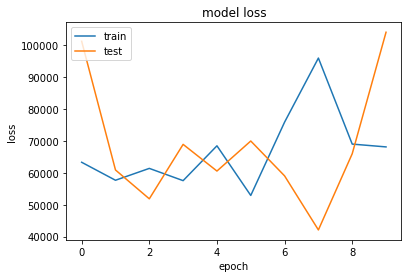

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

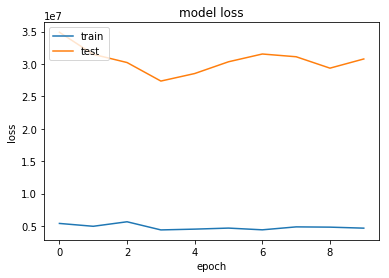

In [25]:
# summarize history for loss
plt.plot(history_TV.history['loss'])
plt.plot(history_TV.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluation
We evaluate the model visually as well as numerically. 

#### Numerical Evaluation
We evaluate the loss on testing data and training data

In [27]:
loss_train = regressor.evaluate(X_train, y_train,batch_size=32,verbose=0)
loss_test = regressor.evaluate(X_test, y_test,batch_size=32,verbose=0)

print 'Training Loss: ', loss_train
print 'Testing Loss: ', loss_test

Training Loss:  89440.2241233
Testing Loss:  123282.677982


In [28]:
loss_train = regressor_TV.evaluate(X_TV_train, y_TV_train,batch_size=32,verbose=0)
loss_test = regressor_TV.evaluate(X_TV_test, y_TV_test,batch_size=32,verbose=0)

print 'Training Loss: ', loss_train
print 'Testing Loss: ', loss_test

Training Loss:  13240438.0441
Testing Loss:  7961551.02532


#### Visual
We plot the real data against the predicted data for each model

In [29]:
inputs = X_test

# Getting the predicted Web View
y_pred = regressor.predict(inputs)

print X_test.shape, len(y_test)

(54300, 7, 15) 54300


In [30]:
inputs = X_TV_test

# Getting the predicted Web View
y_TV_pred = regressor_TV.predict(inputs)

print X_TV_test.shape, len(y_TV_test)

(58427, 7, 7) 58427


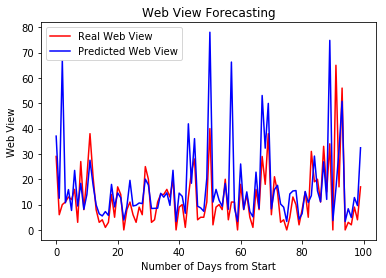

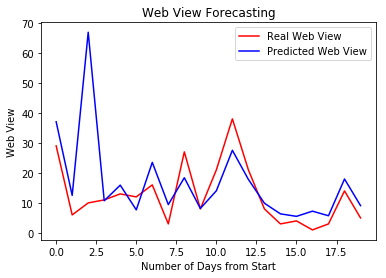

In [31]:
#Visualising Result
plt.figure
plt.plot(y_test[1200:1300], color = 'red', label = 'Real Web View')
plt.plot(y_pred[1200:1300], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()


plt.figure
plt.plot(y_test[1200:1220], color = 'red', label = 'Real Web View')
plt.plot(y_pred[1200:1220], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

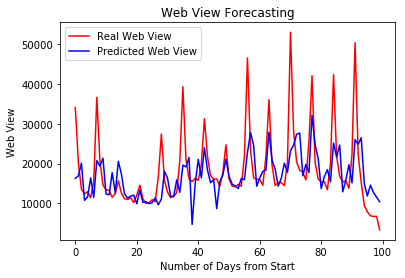

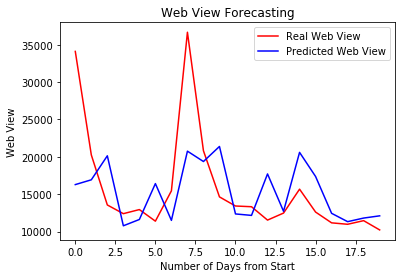

In [52]:
#Visualising Result
plt.figure
plt.plot(y_TV_test[1100:1200], color = 'red', label = 'Real Web View')
plt.plot(y_TV_pred[1100:1200], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()


plt.figure
plt.plot(y_TV_test[1100:1120], color = 'red', label = 'Real Web View')
plt.plot(y_TV_pred[1100:1120], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

### Generative Model
The code below can be used to create a generative model. Given a random seed, the same model can be used to generate the Web Traffic prediction for next 100 days.

In [63]:
start = np.random.randint(0, len(X_TV_test)-1)
pattern = X_TV_test[start,:,:]
y_TV_gen = []
gen_len = 100

for i in range(gen_len):
    x = np.reshape(pattern, (1, 7, 7))
    prediction = regressor_TV.predict(x)
    temp_x = x[:,:,6]
    temp_x = [[temp_x[0][i+1] for i in range(len(temp_x[0])-1)]]
    temp_x[0].append(prediction[0][0])
    x[:,:,6] = temp_x
    pattern = np.array(x)
    y_TV_gen.append(prediction[0])


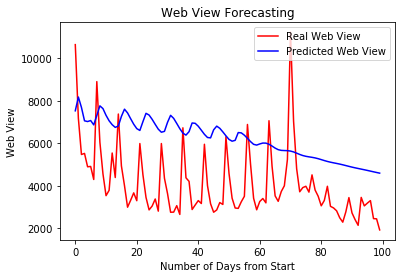

In [64]:
plt.figure
plt.plot(y_TV_test[start:start+gen_len], color = 'red', label = 'Real Web View')
plt.plot(y_TV_gen, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

# 9. Acknowledgements
We would like to thank Google Brain team and the open source community for creating TensorFlow. We would also like to thank François Chollet, Google, Microsoft and all other contributors for creating Keras. We have used both these libraries in our work.
